# IMF - World Economic Outlook database
Notebook developed by Marcelo Rovai - UDD-MDS - July 2018

### Definitions:
All definitions can be found on file:
- WEOApr2018_SDMXDSD.XLSX
- For example: 'LUR' : Unemployment rate as Percent of total labor force.
### Dataset:
http://www.imf.org/external/pubs/ft/weo/2018/01/weodata/download.aspx
- The original dataset is separated by tabs (WEOApr2018all.xls)
- Excel was used to read it and save it as .csv (World_Economic_Outlook_Database_Apr18.csv)
- Estimates started on 2016

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ls

WEOApr2018_SDMXDSD.XLSX
WEOApr2018all.xls
WEO_DS_Analysis.ipynb
WEO_DS_Analysis_LATAM-Copy1.ipynb
WEO_DS_Analysis_LATAM.ipynb
World_Economic_Outlook_Database_Apr18.csv


In [3]:
# Load dataset
df = pd.read_csv('World_Economic_Outlook_Database_Apr18.csv')
df.shape # (8687, 54)

(8687, 54)

In [4]:
df.head()

,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,1980,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Estimates Start After
0,512,AFG,NGDP_R,Afghanistan,"Gross domestic product, constant prices",Expressed in billions of national currency uni...,National currency,Billions,Source: National Statistics Office Latest actu...,NaN,...,484.17,495.629,508.044,520.745,536.276,554.949,577.058,602.932,632.983,2016.0
1,512,AFG,NGDP_RPCH,Afghanistan,"Gross domestic product, constant prices",Annual percentages of constant price GDP are y...,Percent change,NaN,"See notes for: Gross domestic product, consta...",NaN,...,1.31,2.367,2.505,2.5,2.982,3.482,3.984,4.484,4.984,2016.0
2,512,AFG,NGDP,Afghanistan,"Gross domestic product, current prices",Expressed in billions of national currency uni...,National currency,Billions,Source: National Statistics Office Latest actu...,NaN,...,"1,227.95","1,320.24","1,422.01","1,531.95","1,656.57","1,799.95","1,965.32","2,156.19","2,376.89",2016.0
3,512,AFG,NGDPD,Afghanistan,"Gross domestic product, current prices",Values are based upon GDP in national currency...,U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",NaN,...,20.079,19.454,20.889,21.657,22.925,24.244,25.86,27.783,30,2016.0
4,512,AFG,PPPGDP,Afghanistan,"Gross domestic product, current prices",These data form the basis for the country weig...,Purchasing power parity; international dollars,Billions,"See notes for: Gross domestic product, curren...",NaN,...,64.292,66.654,69.553,72.911,76.714,80.945,85.774,91.159,97.367,2016.0


In [6]:
# df.info() # Note that data on each year is a 'string' (dtype: object). Must be converted to float

### Selecting Countries to be part of dataset

In [109]:
df_latam = df[(df.Country == 'Argentina') | 
              (df.Country == 'Brazil') | 
              (df.Country == 'Chile') | 
              (df.Country == 'Peru') |
              (df.Country == 'Venezuela') |
              (df.Country == 'Mexico')]

In [110]:
df_latam.tail()

,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,1980,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Estimates Start After
8500,299,VEN,GGXWDG,Venezuela,General government gross debt,Gross debt consists of all liabilities that re...,National currency,Billions,Source: Ministry of Finance or Treasury Latest...,NaN,...,"2,544.18","8,896.59","102,300.39","56,954,757.81","7,098,743,795.91","881,224,435,190.00","110,696,096,674,818","13,826,953,867,451,900","1,756,278,772,130,830,000",2013.0
8501,299,VEN,GGXWDG_NGDP,Venezuela,General government gross debt,Gross debt consists of all liabilities that re...,Percent of GDP,NaN,See notes for: General government gross debt ...,NaN,...,31.927,31.299,34.866,161.986,172.077,168.141,165.485,160.409,157.681,2013.0
8502,299,VEN,NGDP_FY,Venezuela,Gross domestic product corresponding to fiscal...,Gross domestic product corresponding to fiscal...,National currency,Billions,Source: Ministry of Finance or Treasury Latest...,0.3,...,"7,968.66","28,424.75","293,408.72","35,160,202.90","4,125,335,707.11","524,097,427,161.95","66,891,727,514,064.60","8,619,791,134,782,530","1,113,817,843,651,120,000",2013.0
8503,299,VEN,BCA,Venezuela,Current account balance,Current account is all transactions other than...,U.S. dollars,Billions,Source: Central Bank. http://www.bcv.org.ve/c2...,5.176,...,-16.051,-3.87,4.277,2.421,3.336,0.54,2.198,2.067,1.866,2016.0
8504,299,VEN,BCA_NGDPD,Venezuela,Current account balance,Current account is all transactions other than...,Percent of GDP,NaN,"See notes for: Gross domestic product, curren...",7.411,...,-6.616,-1.639,2.036,2.4,3.61,0.633,2.682,2.644,2.523,2016.0


In [111]:
# Filter 'LUR' : Unemployment rate for selected countries:
df_latam_un = df_latam[df_latam['WEO Subject Code'] == 'LUR']

In [112]:
df_latam_un

,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,1980,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Estimates Start After
250,213,ARG,LUR,Argentina,Unemployment rate,Unemployment rate can be defined by either the...,Percent of total labor force,NaN,Source: National Statistics Office Latest actu...,3,...,NaN,8.467,8.35,8.04,7.469,6.967,6.539,6.075,6,2016.0
1015,223,BRA,LUR,Brazil,Unemployment rate,Unemployment rate can be defined by either the...,Percent of total labor force,NaN,Source: National Statistics Office Latest actu...,NaN,...,8.3,11.267,12.767,11.6,10.5,10.1,9.8,9.5,9.5,2017.0
1510,228,CHL,LUR,Chile,Unemployment rate,Unemployment rate can be defined by either the...,Percent of total labor force,NaN,Source: National Statistics Office Latest actu...,11.502,...,6.214,6.49,6.674,6.238,5.8,5.863,5.9,5.975,6,2017.0
4975,273,MEX,LUR,Mexico,Unemployment rate,Unemployment rate can be defined by either the...,Percent of total labor force,NaN,Source: National Statistics Office Latest actu...,1.2,...,4.35,3.882,3.42,3.5,3.446,3.42,3.411,3.405,3.426,2016.0
6010,293,PER,LUR,Peru,Unemployment rate,Unemployment rate can be defined by either the...,Percent of total labor force,NaN,Source: National Statistics Office Latest actu...,7.326,...,6.44,6.71,6.71,6.71,6.71,6.71,6.71,6.71,6.71,2017.0
8485,299,VEN,LUR,Venezuela,Unemployment rate,Unemployment rate can be defined by either the...,Percent of total labor force,NaN,Source: National Statistics Office Latest actu...,NaN,...,7.4,20.638,27.096,33.35,37.399,39.179,40.774,42.327,44.315,2011.0


In [113]:
# delete columns
del df_latam_un['ISO']
del df_latam_un['WEO Country Code']
del df_latam_un['WEO Subject Code']
del df_latam_un['Subject Descriptor']
del df_latam_un['Subject Notes']
del df_latam_un['Units']
del df_latam_un['Scale']
del df_latam_un['Country/Series-specific Notes']
del df_latam_un['Estimates Start After']

In [114]:
df_latam_un

,Country,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
250,Argentina,3,5,4.5,5,5,6.25,6.3,6,6.5,...,7.25,NaN,8.467,8.35,8.04,7.469,6.967,6.539,6.075,6
1015,Brazil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.792,8.3,11.267,12.767,11.6,10.5,10.1,9.8,9.5,9.5
1510,Chile,11.502,10.291,19.814,20.999,17.515,14.975,12.299,10.984,9.875,...,6.392,6.214,6.49,6.674,6.238,5.8,5.863,5.9,5.975,6
4975,Mexico,1.2,0.9,4.2,6.1,5.6,4.4,4.3,3.883,3.542,...,4.823,4.35,3.882,3.42,3.5,3.446,3.42,3.411,3.405,3.426
6010,Peru,7.326,6.8,6.4,9,8.9,4.589,5.3,4.8,4.156,...,6.03,6.44,6.71,6.71,6.71,6.71,6.71,6.71,6.71,6.71
8485,Venezuela,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.7,7.4,20.638,27.096,33.35,37.399,39.179,40.774,42.327,44.315


In [115]:
# use of "Country" as index
# drop=True which will remove the column, and inplace=True instead of having to 
# assign the variable back to itself or to a new variable name.

df_latam_un.set_index('Country',drop=True,inplace=True)

In [116]:
df_latam_un

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Country,,,,,,,,,,,,,,,,,,,,,
Argentina,3,5,4.5,5,5,6.25,6.3,6,6.5,8,...,7.25,NaN,8.467,8.35,8.04,7.469,6.967,6.539,6.075,6
Brazil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.792,8.3,11.267,12.767,11.6,10.5,10.1,9.8,9.5,9.5
Chile,11.502,10.291,19.814,20.999,17.515,14.975,12.299,10.984,9.875,7.98,...,6.392,6.214,6.49,6.674,6.238,5.8,5.863,5.9,5.975,6
Mexico,1.2,0.9,4.2,6.1,5.6,4.4,4.3,3.883,3.542,2.925,...,4.823,4.35,3.882,3.42,3.5,3.446,3.42,3.411,3.405,3.426
Peru,7.326,6.8,6.4,9,8.9,4.589,5.3,4.8,4.156,7.9,...,6.03,6.44,6.71,6.71,6.71,6.71,6.71,6.71,6.71,6.71
Venezuela,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.7,7.4,20.638,27.096,33.35,37.399,39.179,40.774,42.327,44.315


In [118]:
# Let's consider years as lines:
df_latam_un = df_latam_un.transpose()

In [119]:
df_latam_un.head()

Country,Argentina,Brazil,Chile,Mexico,Peru,Venezuela
1980,3,NaN,11.502,1.2,7.326,NaN
1981,5,NaN,10.291,0.9,6.8,NaN
1982,4.5,NaN,19.814,4.2,6.4,NaN
1983,5,NaN,20.999,6.1,9,NaN
1984,5,NaN,17.515,5.6,8.9,NaN


In [65]:
# df_latam_un.rename(columns={'Country': 'Year'})

In [120]:
# Verify what is the type of data
df_latam_un['Argentina'].head()

1980      3
1981      5
1982    4.5
1983      5
1984      5
Name: Argentina, dtype: object

In [121]:
# The data for each year is a 'string' (dtype: object). Must be converted to float
df_latam_un = df_latam_un.astype('float64')

In [122]:
# Check if data is now a float.
df_latam_un['Argentina'].head()

1980    3.0
1981    5.0
1982    4.5
1983    5.0
1984    5.0
Name: Argentina, dtype: float64

### Visualization 

In [141]:
import seaborn as sns
sns.set()

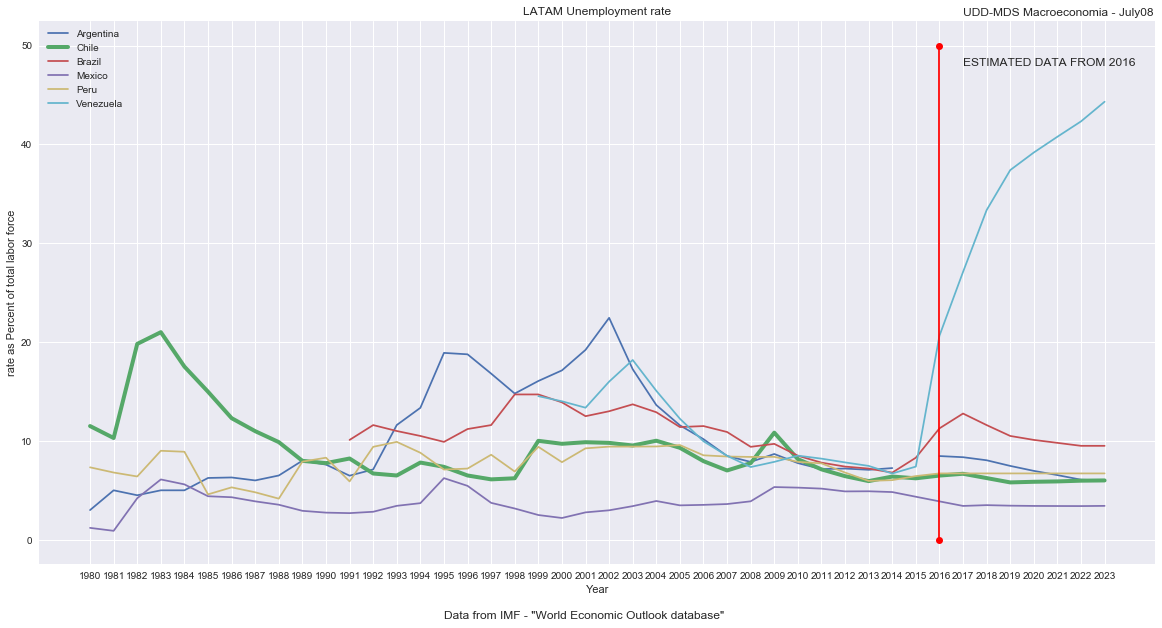

In [199]:
plt.figure(figsize=(20,10))
plt.grid(True)

plt.xlabel('Year')
plt.ylabel('rate as Percent of total labor force')
plt.title('LATAM Unemployment rate')

plt.plot(df_latam_un.Argentina)
plt.plot(df_latam_un.Chile, linewidth=4)
plt.plot(df_latam_un.Brazil)
plt.plot(df_latam_un.Mexico)
plt.plot(df_latam_un.Peru)
plt.plot(df_latam_un.Venezuela)

plt.legend()

x1, y1 = [2016, 2016], [0, 50]
plt.plot(x1, y1, marker = 'o', color='r')
plt.text(x=2017, y= 48, s='ESTIMATED DATA FROM 2016')
plt.text(x=2017, y= 53, s='UDD-MDS Macroeconomia - July08')
plt.text(x=1995, y= -8, s='Data from IMF - "World Economic Outlook database"')
plt.savefig('latam_unemployment')